# What are stocks?

A company's stock share is a piece of the company; more precisely:

A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares."

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,
the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day. The stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 

## Using the yfinance Library to Extract Stock Data


I'll use y-finance (Yahoo Finance) API to obtain the stock ticker and extract information about the stock. 

In [2]:
import yfinance as yf
import pandas as pd

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent [here]( https://aroussi.com/post/python-yahoo-finance).


### Stock Info


Using the attribute  `info` we can extract information about the stock as a Python dictionary.


In [5]:
print(apple)

yfinance.Ticker object <AAPL>


### Analyzing a stock using json

In [8]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
response = requests.get(url)

with open("apple.json", "wb") as f:
    f.write(response.content)


In [9]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [10]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [11]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [12]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [13]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

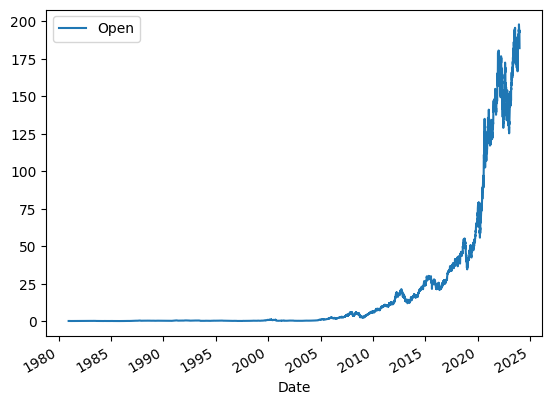

In [14]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [15]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
Name: Dividends, Length: 81, dtype: float64

We can plot the dividends overtime:


<Axes: xlabel='Date'>

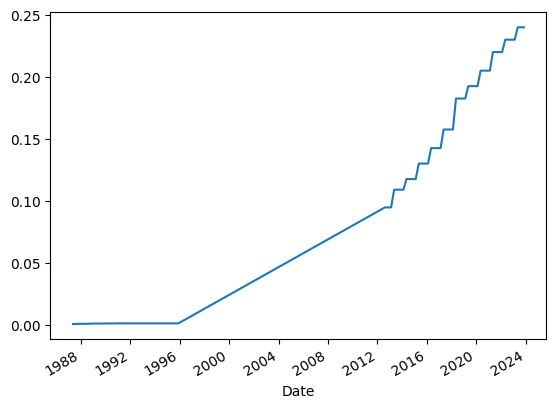

In [16]:
apple.dividends.plot()

### The yfinance Python library

The yfinance is a Python library that provides a user-friendly interface for downloading historical market data from Yahoo Finance. It allows you to get historical stock prices, dividends, and other financial data for stocks, Exchange-Traded Funds (ETFs), and other securities.

This example shows code on how to use yfinance to download historical stock prices:

In [17]:
import yfinance as yf

# Download historical data for a stock
msft = yf.Ticker("MSFT")
msft_data = msft.history(period="max")

# Display the downloaded data
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063503,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063504,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063504,0.064042,0.061350,0.061889,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061888,0.062427,0.060274,0.060812,47894400,0.0,0.0


In the above code:

* First, import the yfinance library using the alias yf.
* Then, create a Ticker object for the Microsoft stock (“MSFT”).
* Use the history method of the Ticker object to download the historical data for the stock. The period parameter of the history method specifies the time period for which we want to download the data. In this example, set it to max to download the maximum amount of available historical data.

Here are some of the possible values for the period parameter and what they represent:

* period="1d": Download 1 day of historical data.
* period="5d": Download 5 days of historical data.
* period="1mo": Download 1 month of historical data.
* period="3mo": Download 3 months of historical data.
* period="6mo": Download 6 months of historical data.
* period="1y": Download 1 year of historical data.
* period="2y": Download 2 years of historical data.
* period="5y": Download 5 years of historical data.
* period="10y": Download 10 years of historical data.
* period="ytd": Download historical data since the beginning of the current year.
* period="max": Download all available historical data.

Finally, we print the downloaded data using the head function. This will display a Pandas DataFrame containing the historical stock prices and other financial data for Microsoft.

In [18]:

msft_data = msft.history(period="5d")

# Display the downloaded data
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-28 00:00:00-05:00,375.369995,376.459991,374.160004,375.279999,14327000,0.0,0.0
2023-12-29 00:00:00-05:00,376.000000,377.160004,373.480011,376.040009,18723000,0.0,0.0
2024-01-02 00:00:00-05:00,373.859985,375.899994,366.769989,370.869995,25258600,0.0,0.0
2024-01-03 00:00:00-05:00,369.010010,373.260010,368.510010,370.600006,23083500,0.0,0.0
2024-01-04 00:00:00-05:00,370.670013,373.100006,367.170013,367.940002,20876900,0.0,0.0


In [19]:
msft.financials

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.189786,0.131134,0.138266,0.16
Normalized EBITDA,102384000000.0,97843000000.0,81602000000.0,65755000000.0
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
Reconciled Depreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
Reconciled Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBITDA,102384000000.0,97843000000.0,81602000000.0,65755000000.0
EBIT,88523000000.0,83383000000.0,69916000000.0,52959000000.0


In [21]:
msft.balance_sheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111262000000.0,104757000000.0,130334000000.0,136527000000.0
Other Short Term Investments,76558000000.0,90826000000.0,116110000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,NaN


In [29]:
# earnings = msft.get_earnings(as_dict="True")